In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [7]:
dataframe = pd.read_csv("Speed Dating Data.csv",encoding="ISO-8859-1")
dataframe.head(10)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [8]:
dataframe['match'].head(10)

0    0
1    0
2    1
3    1
4    1
5    0
6    0
7    0
8    1
9    0
Name: match, dtype: int64

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [13]:
#First thing first: lets seperate feature and label
dataframe, df_labels = dataframe.drop(['match'], axis=1), dataframe['match']


In [14]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 194 entries, iid to amb5_3
dtypes: float64(174), int64(12), object(8)
memory usage: 12.4+ MB


In [16]:
#Preprocesing: it has got 3 steps:
#step 1: Cleaning the data
#Transformation of data
# reduction of feature-sets

#Cleaning the data: lets analyze data closely
dataframe.head(5)


2513.4

In [49]:
#it has got lot of null values (NaN), lets drop out all the columns whose null values are > 30% of overall count
# in a column, if null value count is > 8378*.3= 2513 
column_with_na_data = list(dataframe.isnull().sum().index)
na_sum = list(dataframe.isnull().sum())
len(na_sum)



194

In [51]:
to_be_dropped_column=[]
for i in range(len(na_sum)):
    if na_sum[i]>2513:
        to_be_dropped_column.append(column_with_na_data[i])

print("we can drop: ", len(to_be_dropped_column)," columns")

      

we can drop:  83  columns


In [53]:
dataframe = dataframe.drop(to_be_dropped_column,axis=1)
dataframe.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,NaN,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,NaN,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,NaN,10,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,NaN,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,NaN,7,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [55]:
#inputting null value with mean
dataframe = dataframe.fillna(dataframe.mean())

In [56]:
dataframe.head()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,9.295775,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,9.295775,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,9.295775,10,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,9.295775,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,9.295775,7,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [58]:
#check if any NaN values
dataframe.isnull().values.any()

True

In [66]:
#lets see what all those values which are still null
na_sum = list(dataframe.isnull().sum())
na_column = list(dataframe.isnull().sum().index)

pending_null_value_column = []
for i in range(len(na_sum)):
    if na_sum[i]>0:
        pending_null_value_column.append(na_column[i])

        
pending_null_value_column

['field', 'from', 'zipcode', 'career']

In [67]:
dataframe[pending_null_value_column].head()


,field,from,zipcode,career
0,Law,Chicago,"60,521",lawyer
1,Law,Chicago,"60,521",lawyer
2,Law,Chicago,"60,521",lawyer
3,Law,Chicago,"60,521",lawyer
4,Law,Chicago,"60,521",lawyer


In [69]:
# we dont know what is the best choice to replce null value for such column: hence we would like to drop them 
dataframe = dataframe.drop(pending_null_value_column, axis=1)

In [71]:
#cross check : do we have any more null value
dataframe.isnull().values.any()

False

In [73]:
dataframe.info()
dataframe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 107 entries, iid to amb3_2
dtypes: float64(95), int64(12)
memory usage: 6.8 MB


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,9.295775,4,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,9.295775,3,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,9.295775,10,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,9.295775,5,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,9.295775,7,...,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [77]:
# Step 2 Transformation: we have now cleaned all the data, now we would like to do transformation
# *** we would like to normalize the data***- standard  scaler is going to hep us here
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(dataframe)
X.shape


(8378, 107)

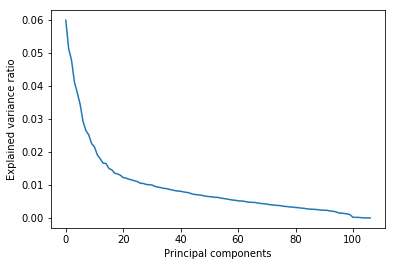

In [81]:
# so far so good. Hurray:-)
# Step3: Reduction: we know we need to use PCA , but how the hell I know that what is the best reduced features...phew........
#Find out what is fairly good value for n_components according to the Explained Variance Ratio
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_full = PCA(n_components = None)
pca_full.fit(X)

plt.plot(range(0,107), pca_full.explained_variance_ratio_)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()


In [82]:
# From above variable we will choose 80 as the diamension for PCA

x_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components = 80)
x_pca = pca.fit_transform(x_scaled)
print(x_pca, end = '\n\n')
print(pca.explained_variance_ratio_)

[[-0.11279084  0.43893876 -3.99011743 ...,  1.47541419 -0.74157277
  -0.11056751]
 [-0.46084862  0.17902022 -3.58830687 ...,  1.58467193 -0.54723228
  -0.20470924]
 [-2.61678064  2.52342649 -5.0427701  ...,  1.77192555 -0.41248643
  -0.22407024]
 ..., 
 [ 4.29349426  3.11398015  8.86818343 ...,  1.1752422   0.6711376
   0.82604371]
 [ 3.0634924   4.8779014   7.91929776 ...,  0.51430097  0.44053354
  -0.31177948]
 [ 1.87201506  5.70640334  7.50898509 ...,  0.71468628  0.06980545
   0.12738421]]

[ 0.0599287   0.05130629  0.04778579  0.04120846  0.03794963  0.03442235
  0.02928028  0.02648273  0.02516247  0.02253369  0.02148449  0.01909422
  0.01792891  0.01660708  0.01649287  0.01499748  0.01459388  0.0135756
  0.01335546  0.01295986  0.01223028  0.01205561  0.01173874  0.0115274
  0.01122596  0.01099925  0.01050495  0.01044227  0.01014914  0.0100701
  0.00998952  0.00958081  0.0093408   0.00921781  0.00898172  0.00889459
  0.00866534  0.00851289  0.00827404  0.00815336  0.00807832  0.0

In [83]:
sum(pca.explained_variance_ratio_)

0.95428380099878252

In [84]:
x_pca.shape

(8378, 80)

In [87]:
# Phew.................... FInally...now lets train our model using DNN Classifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x_pca, df_labels, test_size=0.2, random_state=0)

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
classifier = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns, hidden_units=[80], n_classes=2)

# Fit and predict.
classifier.fit(X_train, y_train, steps=300)
predictions = list(classifier.predict(X_test, as_iterable=True))
score = metrics.accuracy_score(y_test, predictions)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000146AE28D780>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\SANJAY~1\\AppData\\Local\\Temp\\tmpol2r91yv'}
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SK

In [88]:
print('TF Accuracy: ', score)

TF Accuracy:  0.998210023866
